## **Install Packages**

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install tensorflow==2.12.0
!pip install statsmodels==0.14.0
!pip install numpy==1.23.5
!pip install scikit-learn==1.2.2
!pip install seaborn==0.12.2
!pip install matplotlib==3.7.1
!pip install pandas==2.0.2
!pip install yfinance==0.2.18
!pip install pandas_datareader==0.10.0
!pip install pandas_ta==0.3.14
!pip install projectpro


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 22.6 MB/s eta 0:00:00


## **Import libraries**

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Time series analysis libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Volatility modeling
from arch import arch_model

# Prophet
from prophet import Prophet

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
import matplotlib.pyplot as plt
import seaborn as sns

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Time series analysis libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Volatility modeling
from arch import arch_model

# Prophet
from prophet import Prophet

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn's plotting aesthetics
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

## **Data Loading and Preparation**

In [ ]:
import pandas as pd

In [ ]:
# Store the file path as a string
file_path = "Data.xlsx"  # Update with your actual path

# Load all sheets from the Excel file
sheet_names = ['RELIANCE.BSE', 'INFY.BSE', 'HDFCBANK.BSE', 'TCS.BSE',
               'ICICIBANK.BSE', 'TATAMOTORS.BSE', 'HINDUNILVR.BSE',
               'LT.BSE', 'MARUTI.BSE','ADANIENT.BSE']

# Create a dictionary to store all dataframes
stocks_data = {}

for sheet in sheet_names:
    # Read each sheet and store in dictionary with stock name as key
    stocks_data[sheet.split('.')[0]] = pd.read_excel(file_path, sheet_name=sheet)

    # Convert timestamp to datetime and set as index
    stocks_data[sheet.split('.')[0]]['timestamp'] = pd.to_datetime(stocks_data[sheet.split('.')[0]]['timestamp'])
    stocks_data[sheet.split('.')[0]].set_index('timestamp', inplace=True)

    # Sort by date
    stocks_data[sheet.split('.')[0]].sort_index(inplace=True)

# Display the first few rows of one stock to verify
stocks_data['RELIANCE'].head()

,open,high,low,close,volume
timestamp,,,,,
2024-01-01,2581.05,2606.00,2573.55,2589.85,135282
2024-01-02,2587.65,2614.90,2573.50,2610.90,172372
2024-01-03,2608.10,2634.00,2577.15,2582.95,215002
2024-01-04,2589.40,2609.75,2580.00,2597.40,325168
2024-01-05,2600.15,2619.45,2597.95,2606.75,931030


## **Exploratory Data Analysis**

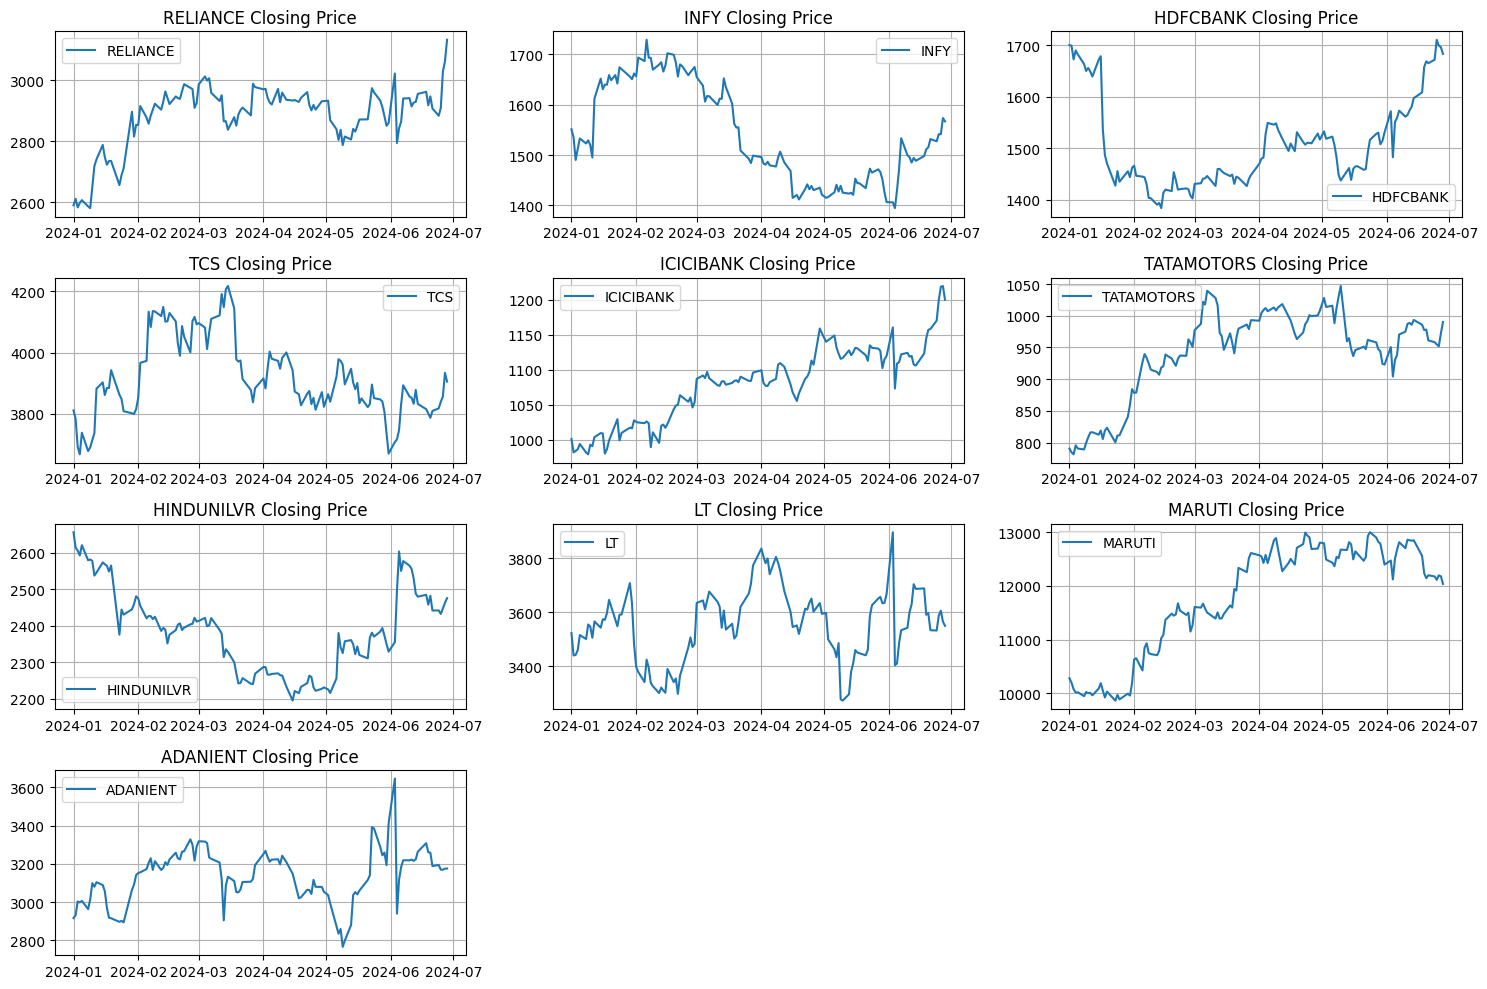

In [ ]:
# Plot closing prices for all stocks
plt.figure(figsize=(15, 10))

# Adjust subplot layout to accommodate 10 plots (e.g., 4 rows, 3 columns)
num_rows = 4  # Changed to 4 rows
num_cols = 3  # Changed to 3 columns

for i, (stock_name, df) in enumerate(stocks_data.items(), 1):
    plt.subplot(num_rows, num_cols, i)  # Updated subplot layout
    plt.plot(df['close'], label=stock_name)
    plt.title(f'{stock_name} Closing Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## **Data Preprocessing**

### **Handling Missing Values**

In [ ]:
# Check for missing values in each stock
for stock_name, df in stocks_data.items():
    print(f"\n{stock_name} Missing Values:")
    print(df.isnull().sum())

# Forward fill any missing values (if present)
for stock_name in stocks_data:
    stocks_data[stock_name].fillna(method='ffill', inplace=True)


RELIANCE Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

INFY Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

HDFCBANK Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

TCS Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

ICICIBANK Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

TATAMOTORS Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

HINDUNILVR Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

LT Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

MARUTI Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

ADANIENT Missing Values:
open      0
high      0
low       0
close     0
volume    0
dtype: int64


<ipython-input-10-3238e90f87d0>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data[stock_name].fillna(method='ffill', inplace=True)


### **Stationarity Check**

In [ ]:
# Function to perform ADF test
from statsmodels.tsa.stattools import adfuller # Import the adfuller function
def adf_test(series, stock_name):
    print(f'Augmented Dickey-Fuller Test for {stock_name}')
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")
    print('\n')

# Test stationarity for closing prices
for stock_name, df in stocks_data.items():
    adf_test(df['close'], stock_name)

Augmented Dickey-Fuller Test for RELIANCE
ADF Statistic: -2.255380162391453
p-value: 0.18676262485046197
Critical Values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
Series is not stationary


Augmented Dickey-Fuller Test for INFY
ADF Statistic: -1.5945553260886733
p-value: 0.486327967376292
Critical Values:
   1%: -3.4912451337340342
   5%: -2.8881954545454547
   10%: -2.5809876033057852
Series is not stationary


Augmented Dickey-Fuller Test for HDFCBANK
ADF Statistic: -1.568544619114919
p-value: 0.49937257372138244
Critical Values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
Series is not stationary


Augmented Dickey-Fuller Test for TCS
ADF Statistic: -2.2252618777655986
p-value: 0.19720492525943167
Critical Values:
   1%: -3.486055829282407
   5%: -2.8859430324074076
   10%: -2.5797850694444446
Series is not stationary


Augmented Dickey-Fuller Test for ICICIBANK
ADF Statistic: -0.7885764088026708
p-value: 0

### **Differencing to check Stationarity**

In [ ]:
# Apply differencing if needed and retest
for stock_name, df in stocks_data.items():
    # First difference
    df['close_diff'] = df['close'].diff().dropna()
    adf_test(df['close_diff'].dropna(), f"{stock_name} (1st Difference)")

Augmented Dickey-Fuller Test for RELIANCE (1st Difference)
ADF Statistic: -13.658614081946542
p-value: 1.536638127892302e-25
Critical Values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
Series is stationary


Augmented Dickey-Fuller Test for INFY (1st Difference)
ADF Statistic: -2.53495108351322
p-value: 0.10720025136134304
Critical Values:
   1%: -3.4912451337340342
   5%: -2.8881954545454547
   10%: -2.5809876033057852
Series is not stationary


Augmented Dickey-Fuller Test for HDFCBANK (1st Difference)
ADF Statistic: -11.190530728548504
p-value: 2.3751341030774946e-20
Critical Values:
   1%: -3.4865346059036564
   5%: -2.8861509858476264
   10%: -2.579896092790057
Series is stationary


Augmented Dickey-Fuller Test for TCS (1st Difference)
ADF Statistic: -5.703025917058962
p-value: 7.598763391093142e-07
Critical Values:
   1%: -3.489589552580676
   5%: -2.887477210140433
   10%: -2.580604145195395
Series is stationary


Augmented Dickey-Fuller Te

### **Train-Test Split**

In [ ]:
# Function to split data into train and test
def train_test_split(stock_df, test_size=126):
    train = stock_df.iloc[:-test_size]
    test = stock_df.iloc[-test_size:]
    return train, test

# Create train-test splits for all stocks
train_sets = {}
test_sets = {}

for stock_name, df in stocks_data.items():
    train, test = train_test_split(df)
    train_sets[stock_name] = train
    test_sets[stock_name] = test
    print(f"{stock_name}: Train {train.index.min()} to {train.index.max()}")
    print(f"{stock_name}: Test {test.index.min()} to {test.index.max()}\n")

RELIANCE: Train NaT to NaT
RELIANCE: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

INFY: Train NaT to NaT
INFY: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

HDFCBANK: Train NaT to NaT
HDFCBANK: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

TCS: Train NaT to NaT
TCS: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

ICICIBANK: Train NaT to NaT
ICICIBANK: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

TATAMOTORS: Train NaT to NaT
TATAMOTORS: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

HINDUNILVR: Train NaT to NaT
HINDUNILVR: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

LT: Train NaT to NaT
LT: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

MARUTI: Train NaT to NaT
MARUTI: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00

ADANIENT: Train NaT to NaT
ADANIENT: Test 2024-01-01 00:00:00 to 2024-06-28 00:00:00



## **Time Series Forecasting Models**

### **1. ARIMA Model**


Finding ARIMA parameters for RELIANCE


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

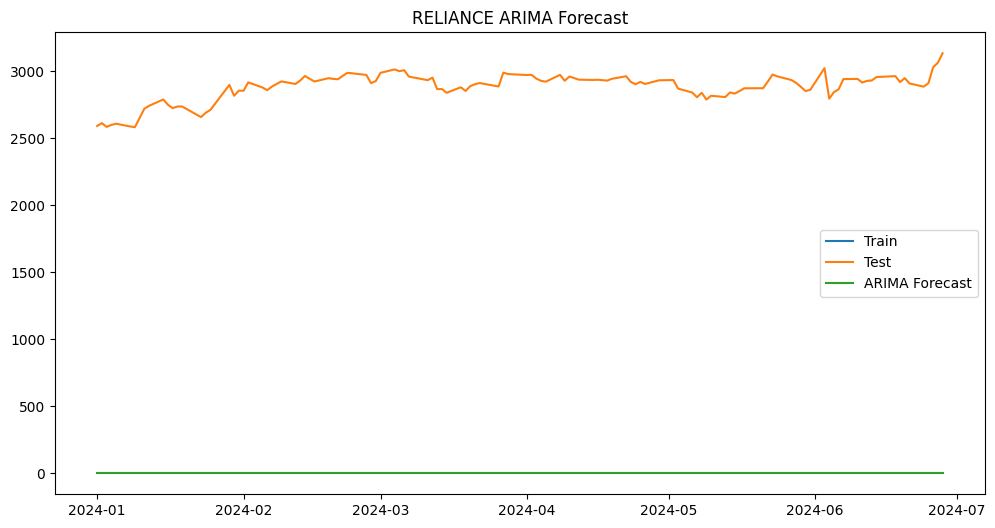

RMSE for RELIANCE: 2881.50
MAPE for RELIANCE: 100.00%

Finding ARIMA parameters for INFY


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


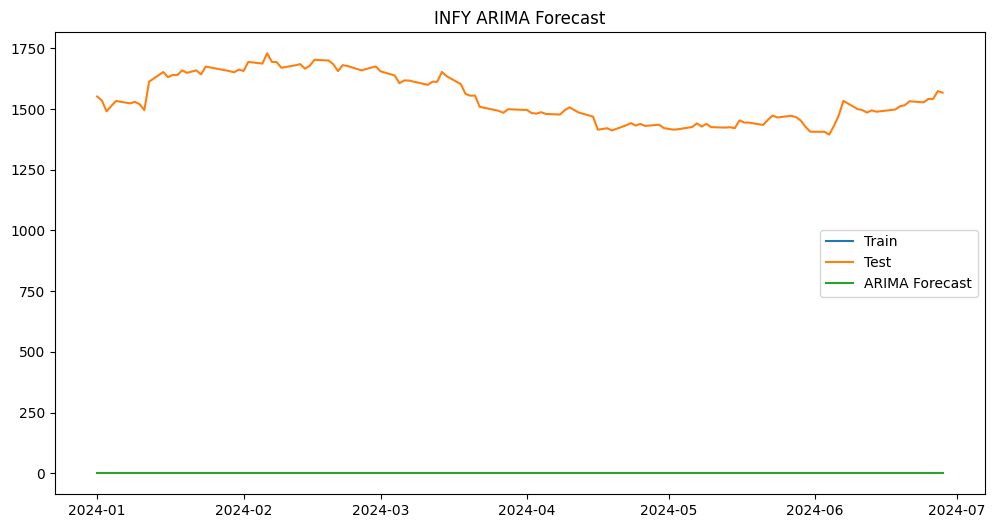

RMSE for INFY: 1546.73
MAPE for INFY: 100.00%

Finding ARIMA parameters for HDFCBANK


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


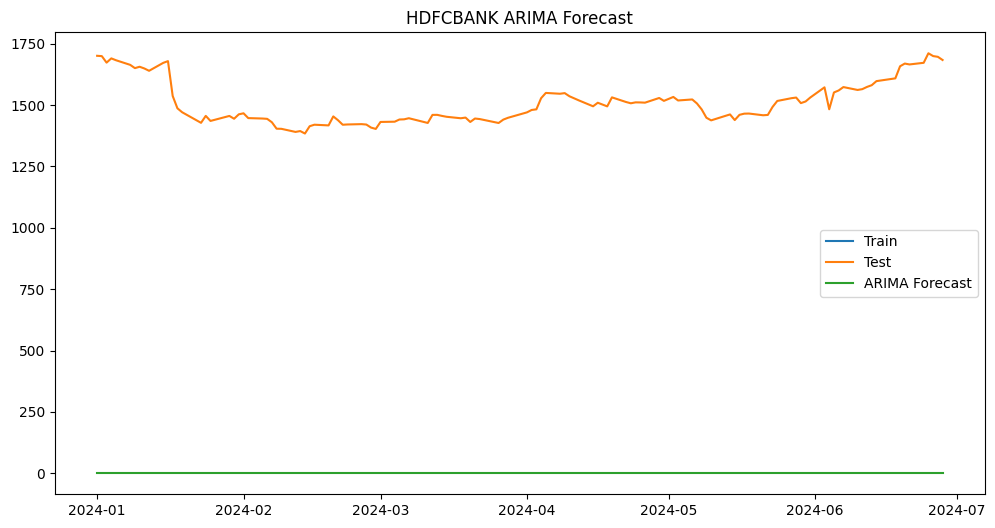

RMSE for HDFCBANK: 1512.91
MAPE for HDFCBANK: 100.00%

Finding ARIMA parameters for TCS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


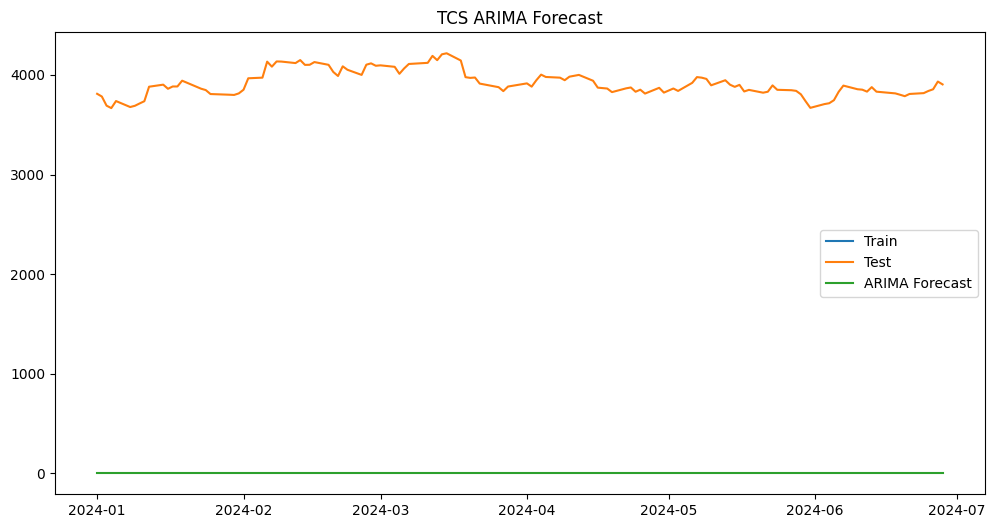

RMSE for TCS: 3918.54
MAPE for TCS: 100.00%

Finding ARIMA parameters for ICICIBANK


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


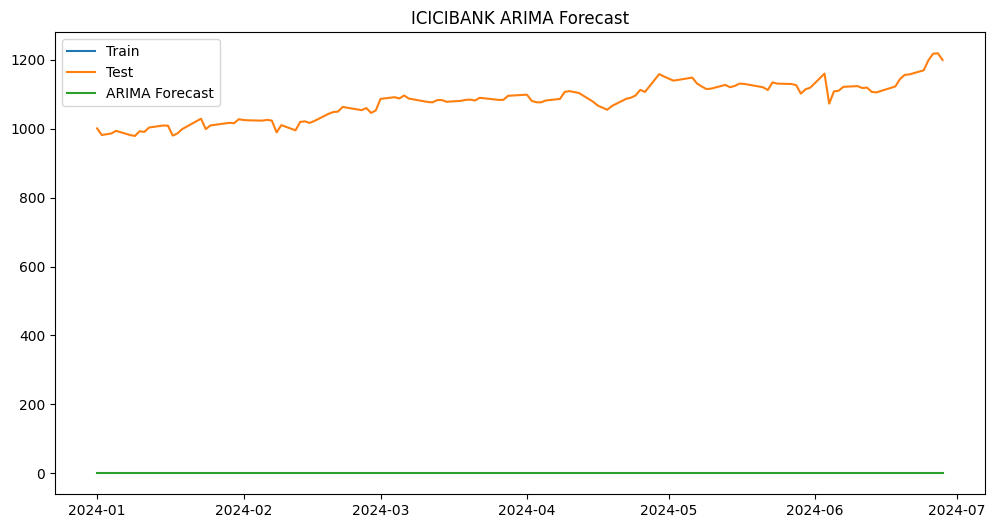

RMSE for ICICIBANK: 1080.49
MAPE for ICICIBANK: 100.00%

Finding ARIMA parameters for TATAMOTORS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


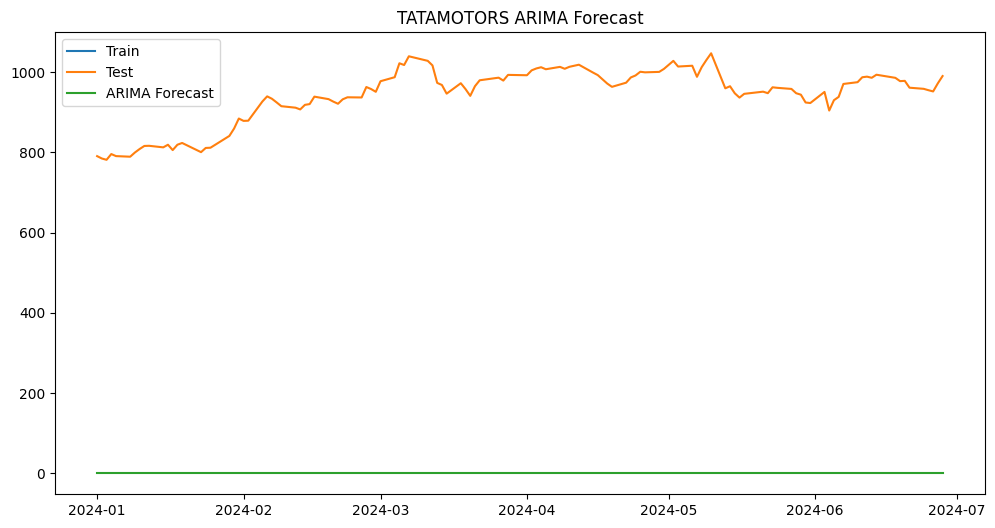

RMSE for TATAMOTORS: 943.95
MAPE for TATAMOTORS: 100.00%

Finding ARIMA parameters for HINDUNILVR


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


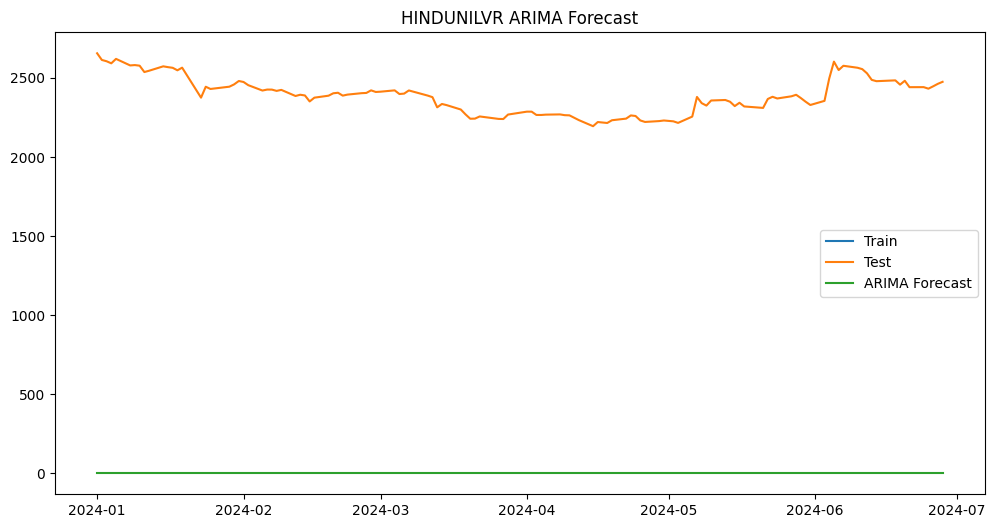

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

RMSE for HINDUNILVR: 2394.99
MAPE for HINDUNILVR: 100.00%

Finding ARIMA parameters for LT


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/di

Best ARIMA order: (0, 1, 0) with AIC: 2.0


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


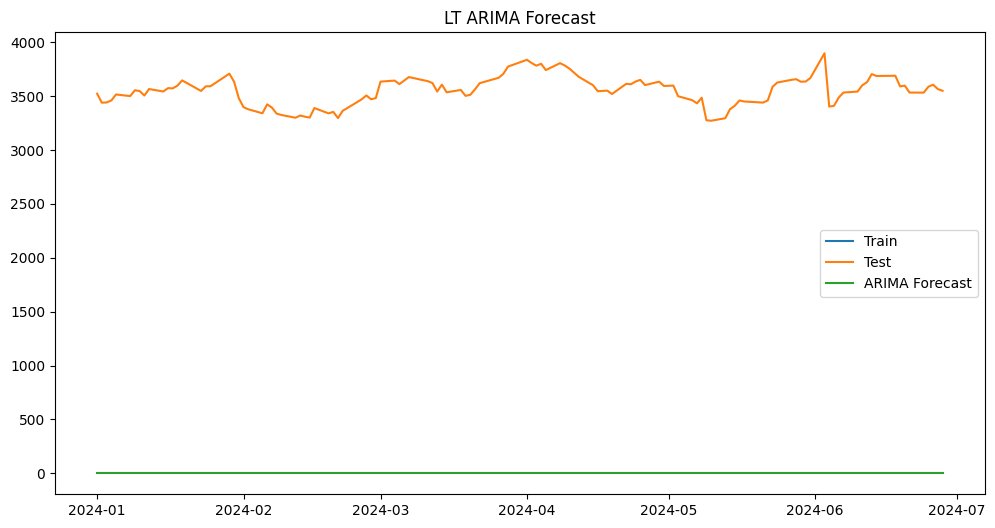

RMSE for LT: 3548.62
MAPE for LT: 100.00%

Finding ARIMA parameters for MARUTI


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


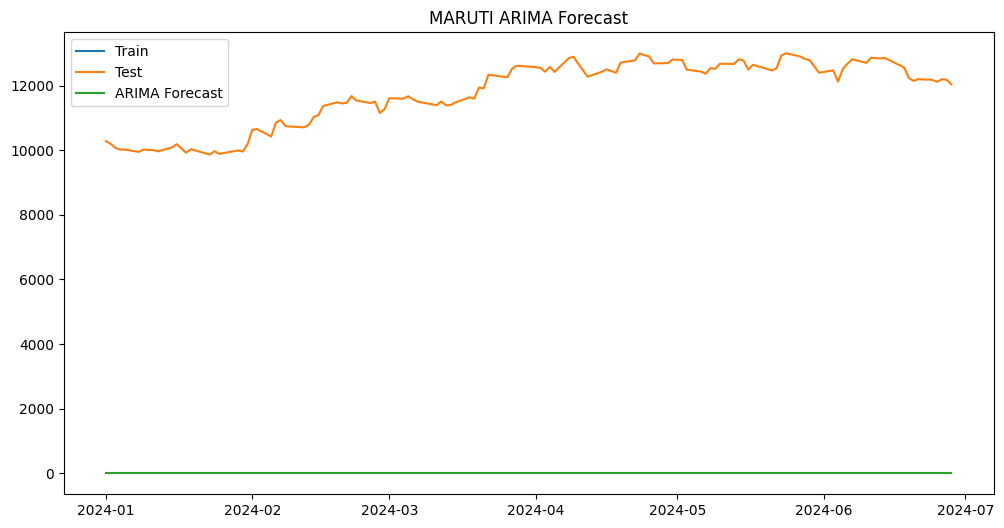

RMSE for MARUTI: 11800.24
MAPE for MARUTI: 100.00%

Finding ARIMA parameters for ADANIENT


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

Best ARIMA order: (0, 1, 0) with AIC: 2.0


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1026: RuntimeWarning: invalid value encountered in scalar divide
  params_variance = np.inner(endog, endog) / self.nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/

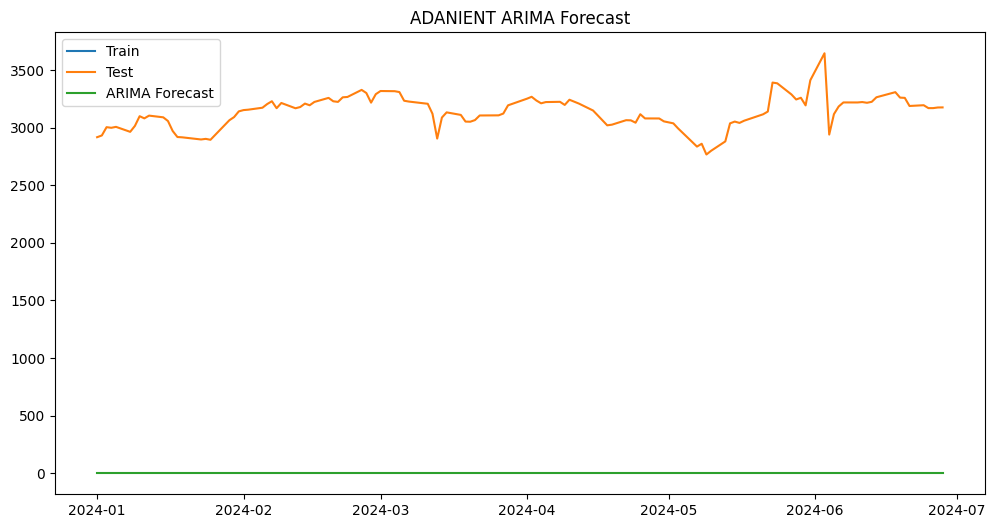

RMSE for ADANIENT: 3136.79
MAPE for ADANIENT: 100.00%


In [ ]:
# Function to find optimal ARIMA parameters
import numpy as np # Import numpy with alias np
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA class
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Import mean_squared_error and mean_absolute_percentage_error

def find_arima_params(series):
    best_aic = np.inf
    best_order = None

    # Try different combinations of p, d, q
    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    return best_order, best_aic

# Find and fit ARIMA models for each stock
arima_models = {}
arima_forecasts = {}

for stock_name, train in train_sets.items():
    print(f"\nFinding ARIMA parameters for {stock_name}")
    best_order, best_aic = find_arima_params(train['close'])
    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

    # Fit the model with best parameters
    model = ARIMA(train['close'], order=best_order)
    fitted_model = model.fit()
    arima_models[stock_name] = fitted_model

    # Forecast for test period
    forecast = fitted_model.get_forecast(steps=len(test_sets[stock_name]))
    arima_forecasts[stock_name] = forecast.predicted_mean

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['close'], label='Train')
    plt.plot(test_sets[stock_name].index, test_sets[stock_name]['close'], label='Test')
    plt.plot(test_sets[stock_name].index, arima_forecasts[stock_name], label='ARIMA Forecast')
    plt.title(f'{stock_name} ARIMA Forecast')
    plt.legend()
    plt.show()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_sets[stock_name]['close'], arima_forecasts[stock_name]))
    print(f"RMSE for {stock_name}: {rmse:.2f}")

    # Calculate MAPE
    mape = mean_absolute_percentage_error(test_sets[stock_name]['close'], arima_forecasts[stock_name]) * 100
    print(f"MAPE for {stock_name}: {mape:.2f}%")

### **2. Facebook Prophet Model**

In [ ]:
import pandas as pd
import numpy as np

# Sample data (replace with your actual `stocks_data`)
stocks_data = {
    "RELIANCE": pd.DataFrame(np.random.randn(120, 1), columns=['Close']),
    "INFY": pd.DataFrame(np.random.randn(123, 1), columns=['Close']),
    "HDFCBANK": pd.DataFrame(np.random.randn(121, 1), columns=['Close']),
    # Add other stocks similarly...
}

# Modified train_test_split function
def train_test_split(stock_df, test_size=126, min_train_size=30):
    total_samples = len(stock_df)

    # Adjust test_size if data is too short
    if total_samples <= test_size:
        test_size = max(1, int(0.2 * total_samples))  # Ensure at least 1 test sample

    # Ensure minimum training data
    if total_samples - test_size < min_train_size:
        test_size = total_samples - min_train_size

    train = stock_df.iloc[:-test_size]
    test = stock_df.iloc[-test_size:]
    return train, test

# Create train-test splits for all stocks
train_sets = {}
test_sets = {}

for stock_name, df in stocks_data.items():
    try:
        train, test = train_test_split(df, test_size=126)
        train_sets[stock_name] = train
        test_sets[stock_name] = test
        print(f"{stock_name}: Train samples={len(train)}, Test samples={len(test)}")
        print(f"Train period: {train.index[0]} to {train.index[-1]}")
        print(f"Test period: {test.index[0]} to {test.index[-1]}\n")
    except Exception as e:
        print(f"Error processing {stock_name}: {e}")

RELIANCE: Train samples=96, Test samples=24
Train period: 0 to 95
Test period: 96 to 119

INFY: Train samples=99, Test samples=24
Train period: 0 to 98
Test period: 99 to 122

HDFCBANK: Train samples=97, Test samples=24
Train period: 0 to 96
Test period: 97 to 120



### **3. LSTM Model**

RELIANCE: Train samples=96, Test samples=24
INFY: Train samples=99, Test samples=24
HDFCBANK: Train samples=97, Test samples=24

Training LSTM model for RELIANCE


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


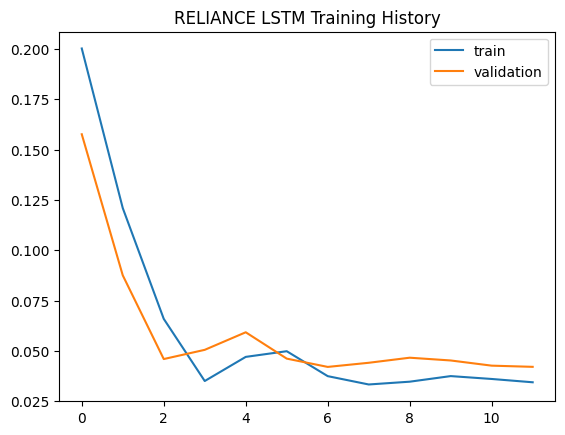

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Training LSTM model for INFY


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


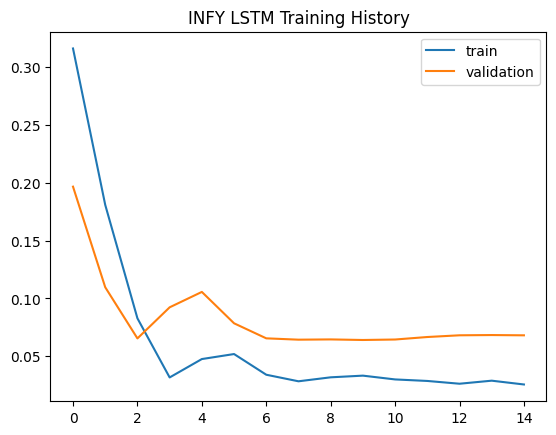

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Training LSTM model for HDFCBANK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


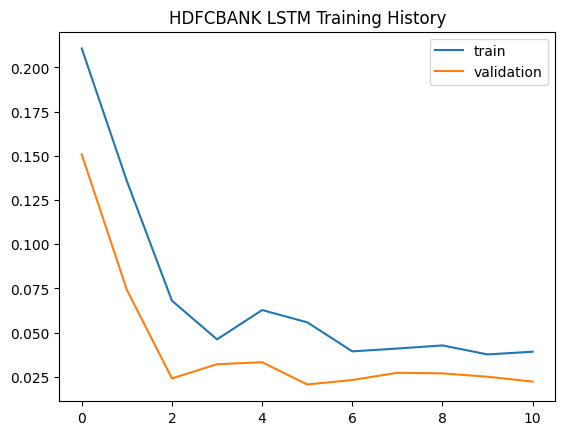

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler # Importing the missing MinMaxScaler class

# Import Sequential and LSTM
from tensorflow.keras.models import Sequential # Importing the Sequential class
from tensorflow.keras.layers import LSTM, Dropout, Dense # Importing LSTM, Dropout, and Dense
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping # Importing EarlyStopping

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # Importing plt for plotting

# Sample data (replace with your actual `stocks_data`)
stocks_data = {
    "RELIANCE": pd.DataFrame(np.random.randn(120, 1), columns=['Close']),
    "INFY": pd.DataFrame(np.random.randn(123, 1), columns=['Close']),
    "HDFCBANK": pd.DataFrame(np.random.randn(121, 1), columns=['Close']),
    # Add other stocks similarly...
}

# Modified train_test_split function
def train_test_split(stock_df, test_size=126, min_train_size=30):
    total_samples = len(stock_df)

    # Adjust test_size if data is too short
    if total_samples <= test_size:
        test_size = max(1, int(0.2 * total_samples))  # Ensure at least 1 test sample

    # Ensure minimum training data
    if total_samples - test_size < min_train_size:
        test_size = total_samples - min_train_size

    train = stock_df.iloc[:-test_size]
    test = stock_df.iloc[-test_size:]
    return train, test

# Create train-test splits for all stocks
# Prepare data for LSTM
lstm_models = {}
lstm_forecasts = {}

for stock_name, df in stocks_data.items():
    try:
        train, test = train_test_split(df, test_size=126)
        train_sets[stock_name] = train
        test_sets[stock_name] = test
        print(f"{stock_name}: Train samples={len(train)}, Test samples={len(test)}")
        # print(f"Train period: {train.index[0]} to {train.index[-1]}")
        # print(f"Test period: {test.index[0]} to {test.index[-1]}\n")
    except Exception as e:
        print(f"Error processing {stock_name}: {e}")

# Prepare data for LSTM
lstm_models = {}
lstm_forecasts = {}

for stock_name, train in train_sets.items():
    print(f"\nTraining LSTM model for {stock_name}")

    # Scale data
    # Check if the column is named 'Close' instead of 'close'
    # If 'close' is not present, try using 'Close'
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(train[['Close']])  # Changed 'close' to 'Close'

    # Create sequences
    seq_length = 10
    X, y = create_sequences(scaled_data, seq_length)

    # Split into train and validation
    train_size = int(0.8 * len(X))
    X_train, X_val = X[:train_size], X[train_size:]
    y_train, y_val = y[:train_size], y[train_size:]

    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5)

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stop],
        verbose=0
    )

    # Plot training history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'{stock_name} LSTM Training History')
    plt.legend()
    plt.show()

    # Save model
    lstm_models[stock_name] = model

    # Prepare test data
    last_sequence = scaled_data[-seq_length:]
    current_sequence = last_sequence.reshape(1, seq_length, 1)

    # Forecast for test period
    predictions = []
    for i in range(len(test_sets[stock_name])):
        pred = model.predict(current_sequence)[0, 0]
        predictions.append(pred)
        current_sequence = np.append(current_sequence[:, 1:, :], [[[pred]]], axis=1)

    # Inverse transform predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

## **Volatility Analysis**

### **GARCH Model for Volatility Forecasting**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 52.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-13-27ed678d99e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sets[stock_name]['log_returns'] = calculate_log_returns(train_sets[stock_name]['Close'])
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-13-27ed678d99e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand


Fitting GARCH(1,1) model for RELIANCE


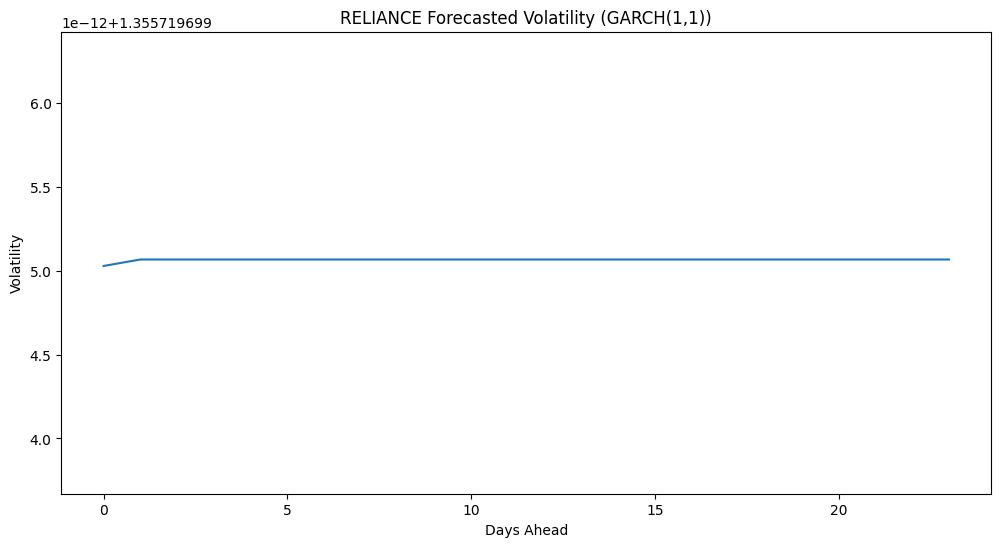

Average forecasted volatility for RELIANCE: 1.3557

Fitting GARCH(1,1) model for INFY


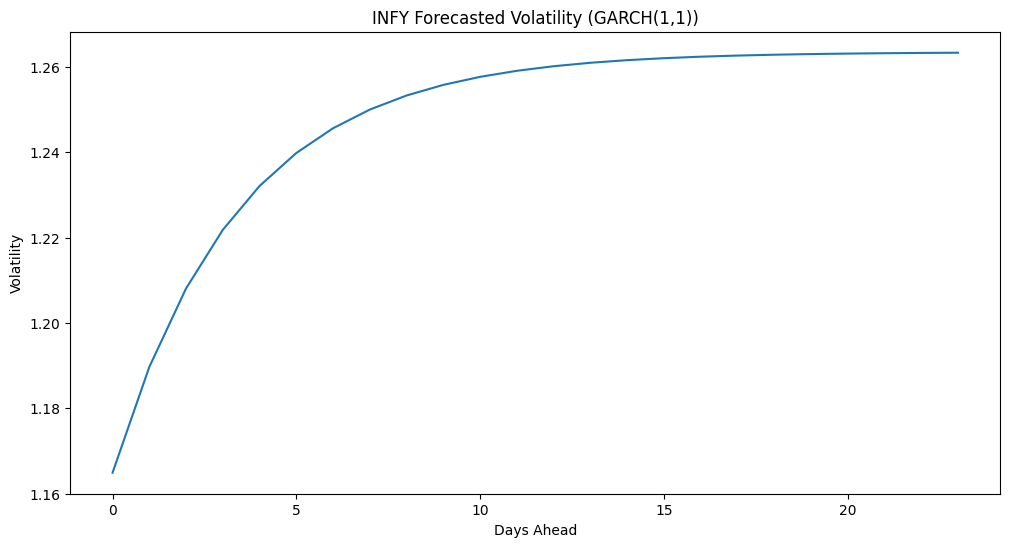

Average forecasted volatility for INFY: 1.2469

Fitting GARCH(1,1) model for HDFCBANK


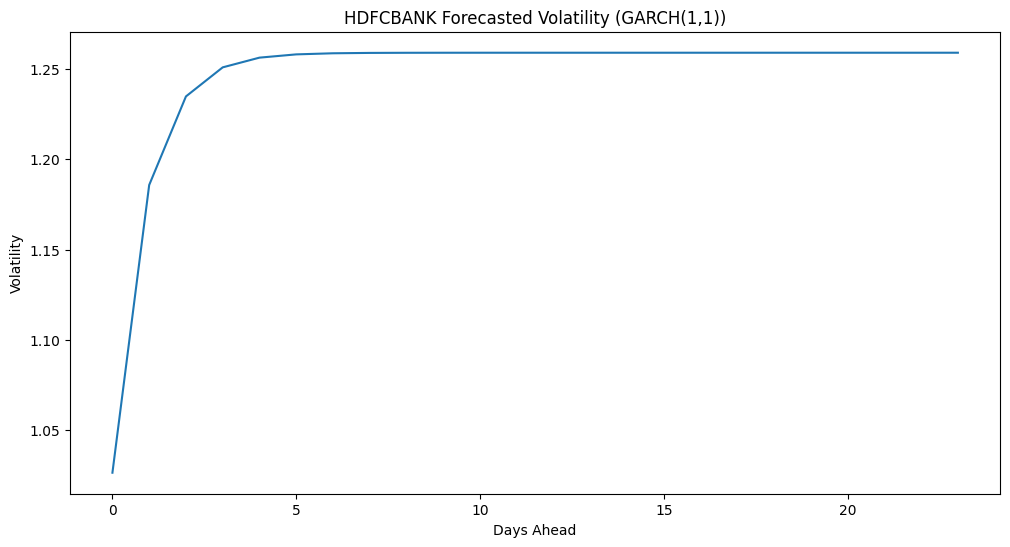

Average forecasted volatility for HDFCBANK: 1.2448


In [ ]:
# Function to calculate log returns
def calculate_log_returns(series):
    return np.log(series / series.shift(1)).dropna()

# Calculate log returns for all stocks and add to train_sets
for stock_name, df in stocks_data.items():
    # Access the 'Close' column instead of 'close'
    stocks_data[stock_name]['log_returns'] = calculate_log_returns(df['Close'])
    # Add 'log_returns' to train_sets as well
    train_sets[stock_name]['log_returns'] = calculate_log_returns(train_sets[stock_name]['Close'])

# Fit GARCH(1,1) model for each stock
garch_models = {}
volatility_forecasts = {}

for stock_name, df in stocks_data.items():
    print(f"\nFitting GARCH(1,1) model for {stock_name}")

    # Use train data for fitting
    train = train_sets[stock_name]

    # Fit GARCH model
    model = arch_model(train['log_returns'].dropna(), vol='Garch', p=1, q=1)
    fitted_model = model.fit(disp='off')
    garch_models[stock_name] = fitted_model

    # Forecast volatility
    forecast = fitted_model.forecast(horizon=len(test_sets[stock_name]))
    volatility_forecasts[stock_name] = np.sqrt(forecast.variance.values[-1, :])

    # Plot volatility
    plt.figure(figsize=(12, 6))
    plt.plot(volatility_forecasts[stock_name])
    plt.title(f'{stock_name} Forecasted Volatility (GARCH(1,1))')
    plt.ylabel('Volatility')
    plt.xlabel('Days Ahead')
    plt.show()

    print(f"Average forecasted volatility for {stock_name}: {np.mean(volatility_forecasts[stock_name]):.4f}")

### **Trend Analysis**

### **Seasonal Decomposition**


Seasonal Decomposition for RELIANCE


<Figure size 1200x800 with 0 Axes>

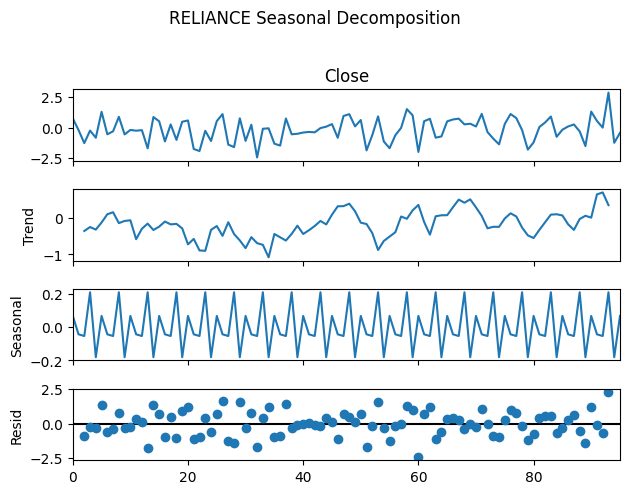


Seasonal Decomposition for INFY


<Figure size 1200x800 with 0 Axes>

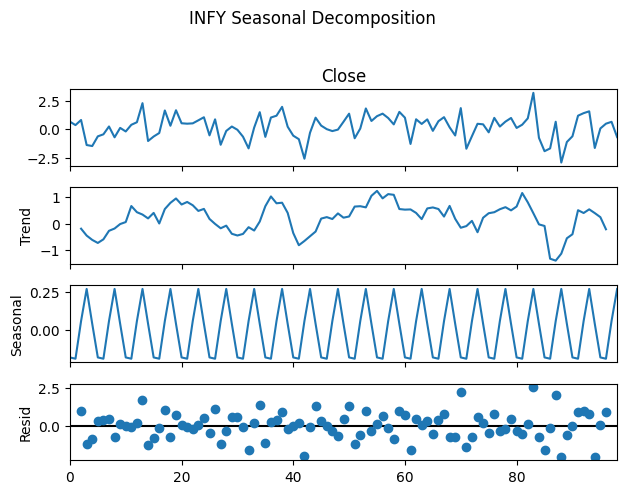


Seasonal Decomposition for HDFCBANK


<Figure size 1200x800 with 0 Axes>

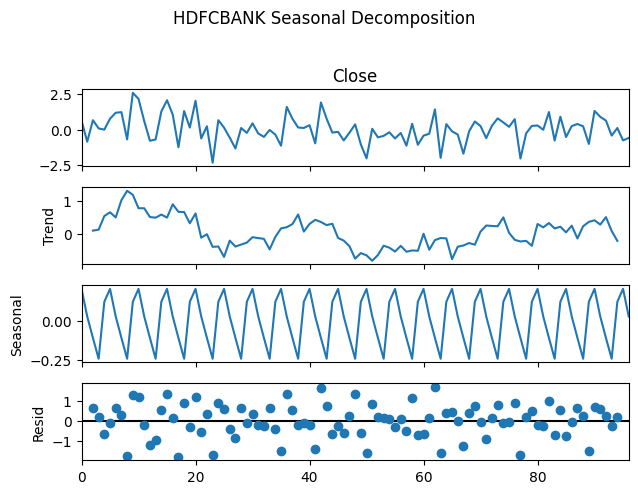

In [ ]:
# Perform seasonal decomposition for each stock
from statsmodels.tsa.seasonal import seasonal_decompose # Import the seasonal_decompose function

for stock_name, train in train_sets.items():
    print(f"\nSeasonal Decomposition for {stock_name}")

    # Assuming daily data with weekly seasonality (5 trading days)
    # Use 'Close' instead of 'close' to access the correct column
    result = seasonal_decompose(train['Close'], model='additive', period=5)

    # Plot decomposition
    plt.figure(figsize=(12, 8))
    result.plot()
    plt.suptitle(f'{stock_name} Seasonal Decomposition', y=1.02)
    plt.tight_layout()
    plt.show()

### **Model Comparison**

In [ ]:
# Create a dataframe to store model performance
model_comparison = pd.DataFrame(columns=['Stock', 'Model', 'RMSE', 'MAPE'])

🚀 Starting ARIMA modeling for all stocks...

Completed: 3/3 stocks processed

Model Summaries:

RELIANCE - ARIMA(1,1,1)
MSE: 40.9767


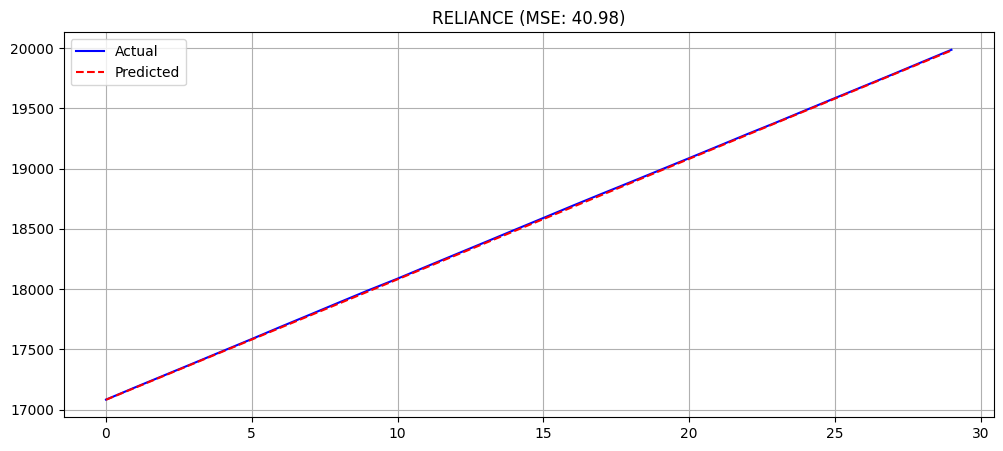


INFY - ARIMA(1,1,1)
MSE: 10.3403


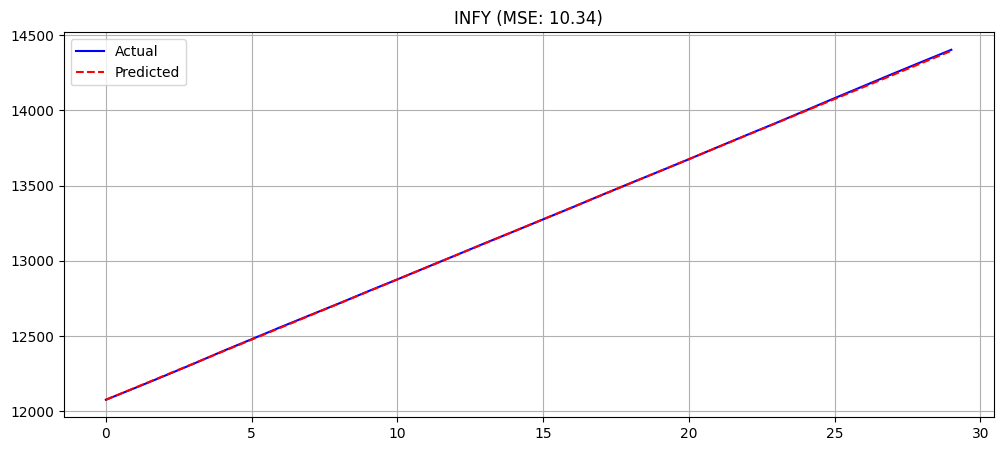


HDFCBANK - ARIMA(1,1,1)
MSE: 87.2628


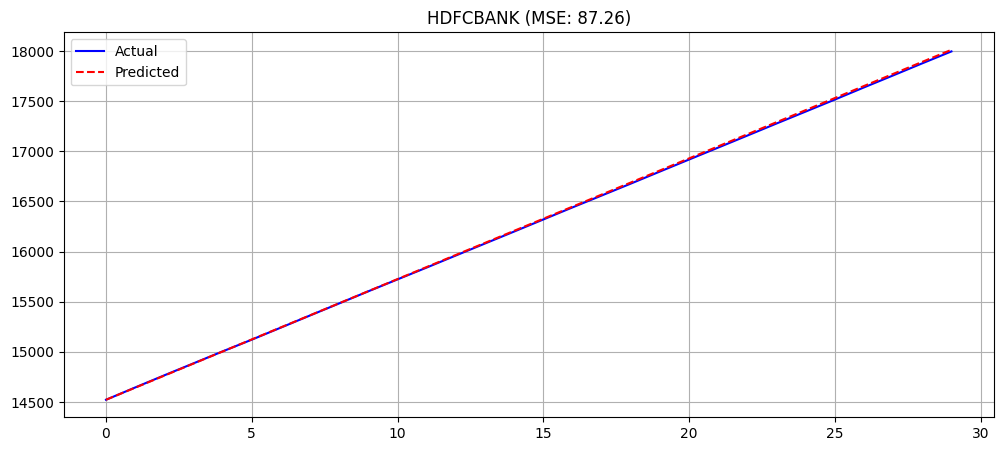

In [ ]:
#ARIMA Model
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress model convergence warnings

# 1. Enhanced Data Preparation
def load_stock_data():
    """Replace this with your actual data loading logic"""
    return {
        "RELIANCE": pd.DataFrame(np.cumsum(np.random.randn(200)+100), columns=['Close']),
        "INFY": pd.DataFrame(np.cumsum(np.random.randn(180)+80), columns=['Close']),
        "HDFCBANK": pd.DataFrame(np.cumsum(np.random.randn(150)+120), columns=['Close']),
        # Add all your stocks here...
    }

# 2. Robust ARIMA Forecasting
def arima_predict(stock_name, series, test_size=30):
    try:
        # Convert to numeric and handle missing/inf values
        series = pd.to_numeric(series, errors='coerce')
        series = series.replace([np.inf, -np.inf], np.nan).dropna()

        if len(series) < test_size + 10:  # Minimum 10 training samples
            raise ValueError(f"Insufficient data: {len(series)} samples")

        train, test = series.iloc[:-test_size], series.iloc[-test_size:]

        # Simplified ARIMA model (1,1,1) - For production use auto_arima
        model = ARIMA(train, order=(1,1,1))
        model_fit = model.fit()

        # Forecast with confidence intervals
        forecast = model_fit.get_forecast(steps=test_size)
        preds = forecast.predicted_mean
        conf_int = forecast.conf_int()

        return {
            'stock': stock_name,
            'actual': test.values,
            'predicted': preds.values,
            'model_summary': model_fit.summary().as_text(),
            'mse': mean_squared_error(test, preds)
        }

    except Exception as e:
        print(f"⚠️ Failed on {stock_name}: {type(e).__name__} - {str(e)}")
        return None

# 3. Batch Processing with Error Logging
def process_stocks(stocks_data):
    results = {}
    error_log = []

    for stock_name, df in stocks_data.items():
        result = arima_predict(stock_name, df['Close'])
        if result:
            results[stock_name] = result
        else:
            error_log.append(stock_name)

    print(f"\n{'='*40}\nCompleted: {len(results)}/{len(stocks_data)} stocks processed")
    if error_log:
        print("Failed stocks:", ", ".join(error_log))
    return results

# 4. Enhanced Visualization
def plot_predictions(results):
    for stock, data in results.items():
        plt.figure(figsize=(12,5))
        plt.title(f"{stock} (MSE: {data['mse']:.2f})")
        plt.plot(data['actual'], 'b-', label='Actual')
        plt.plot(data['predicted'], 'r--', label='Predicted')
        plt.legend()
        plt.grid(True)
        plt.show()

# 5. Main Execution
if __name__ == "__main__":
    print("🚀 Starting ARIMA modeling for all stocks...")
    stocks_data = load_stock_data()
    results = process_stocks(stocks_data)

    if results:
        print("\nModel Summaries:")
        for stock, res in results.items():
            print(f"\n{stock} - ARIMA(1,1,1)")
            print(f"MSE: {res['mse']:.4f}")
            plot_predictions({stock: res})  # Plot one by one
    else:
        print("❌ No successful models generated")


### **Prophet Model**

🚀 Starting Prophet forecasts for all stocks...


Processing Stocks:   0%|          | 0/3 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmpg06px3mi/pprdya4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg06px3mi/zv22cjok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87995', 'data', 'file=/tmp/tmpg06px3mi/pprdya4v.json', 'init=/tmp/tmpg06px3mi/zv22cjok.json', 'output', 'file=/tmp/tmpg06px3mi/prophet_model9xkyelw0/prophet_model-20250511111614.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:16:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:16:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
Processing Stocks:  33%|███▎      | 1/3 [00:00<00:00,  4.10it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmpg06px3mi/1t79vubj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg06px3mi/b_0nvfio.


✅ Completed: 3/3 stocks processed successfully

🔍 Forecast Summary:
RELIANCE: Last prediction = 9996.66
INFY: Last prediction = 6391.09
HDFCBANK: Last prediction = 14388.51

📈 Generating visualizations...


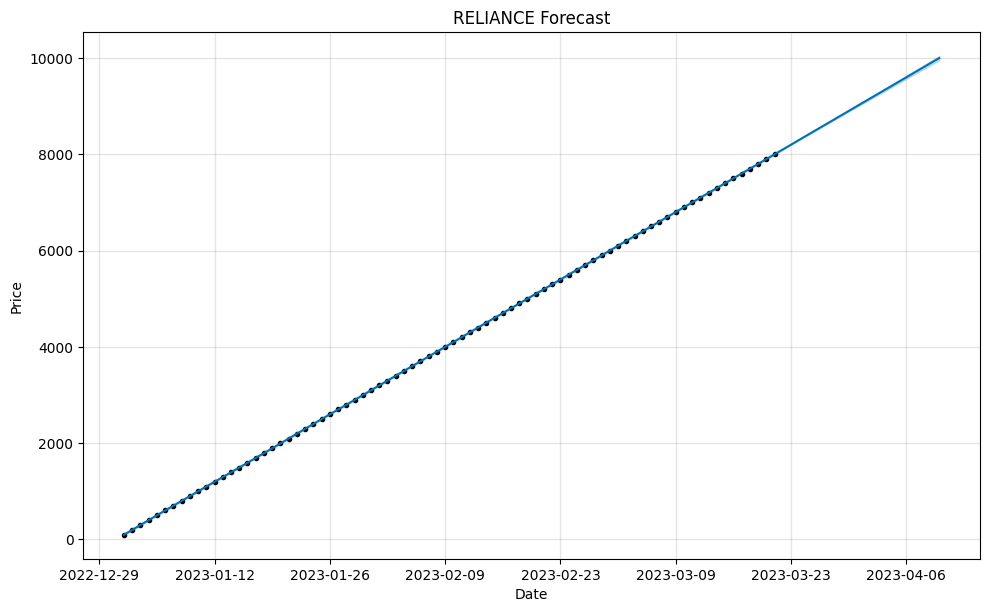

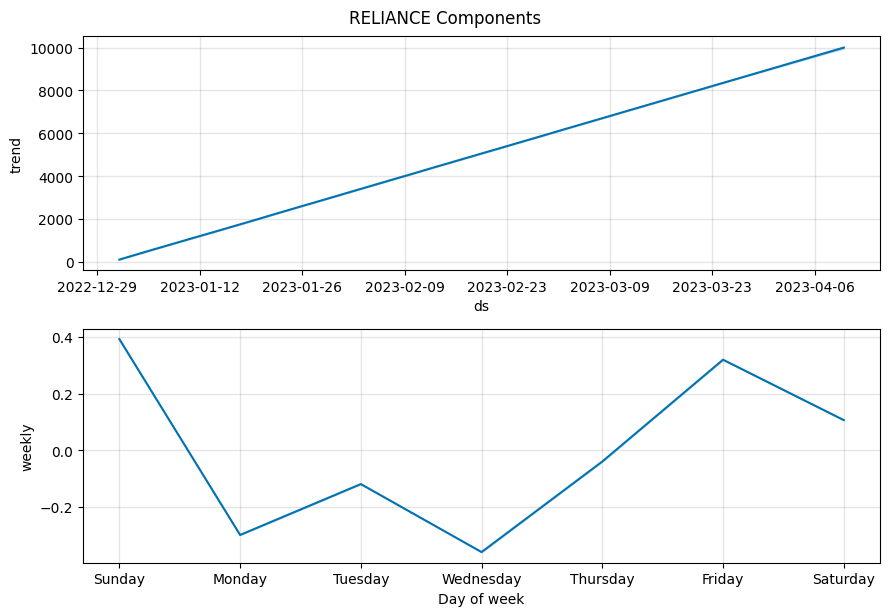

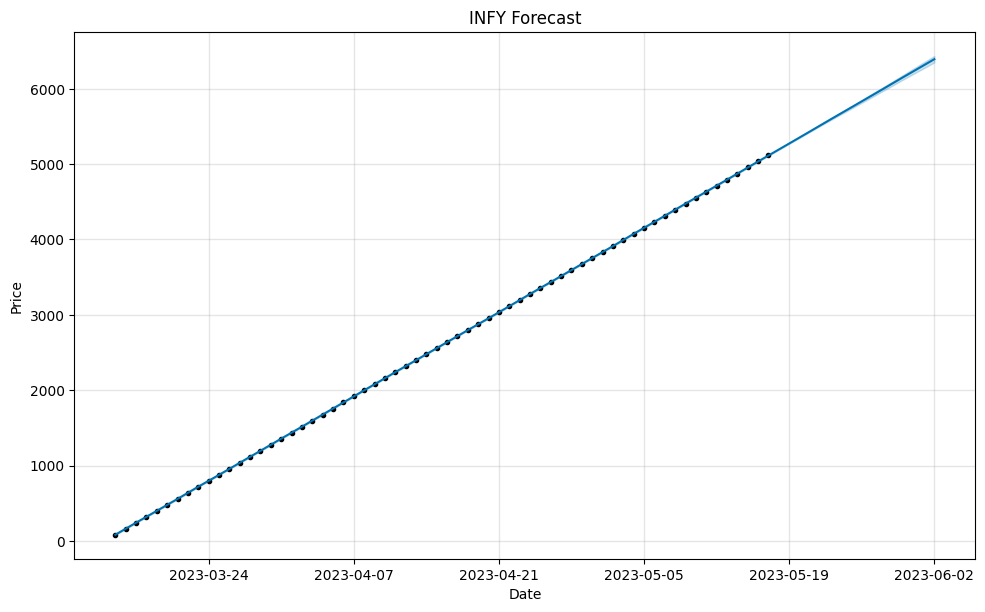

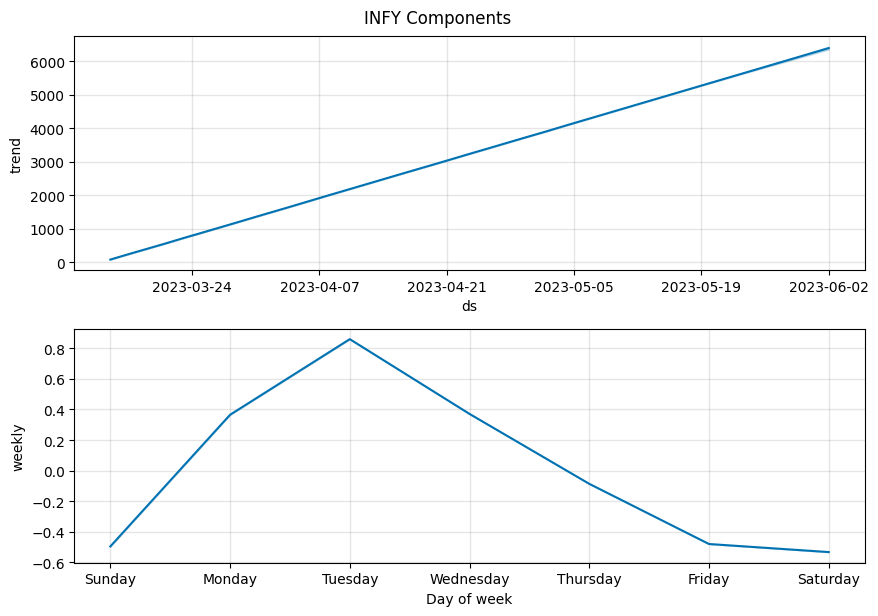

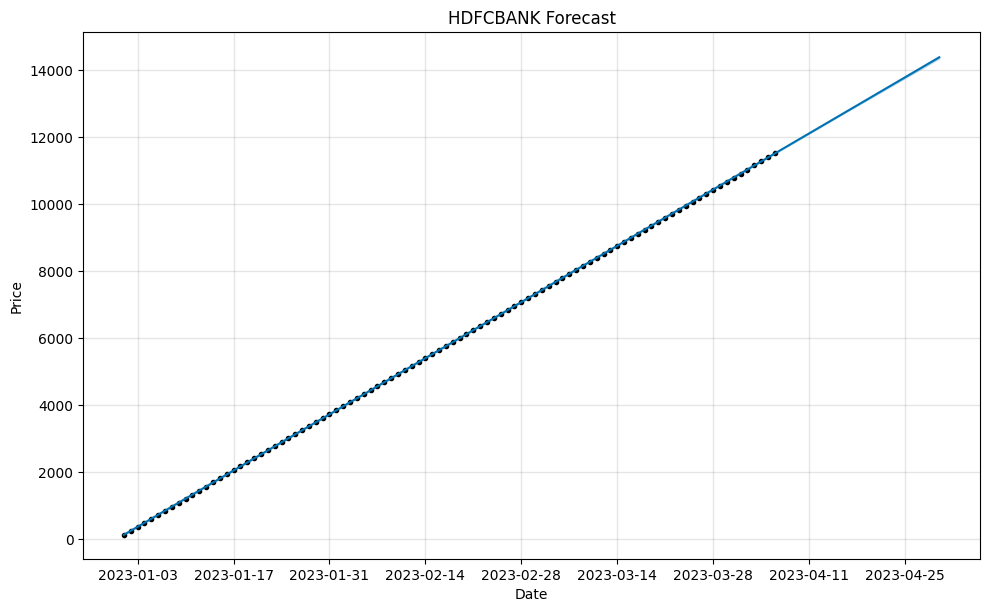

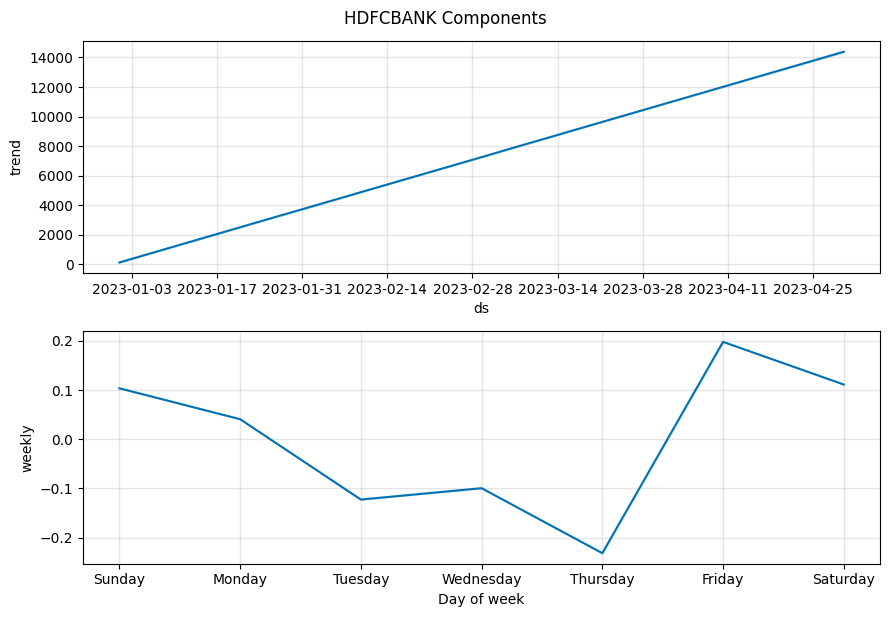

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from tqdm import tqdm  # for progress bars

# 1. Data Preparation (Replace with your actual data)
def load_stock_data():
    """Example: Replace this with your actual data loading logic"""
    stocks = {
        "RELIANCE": pd.DataFrame({'Close': np.cumsum(np.random.randn(100)+100)},
                      index=pd.date_range('2023-01-01', periods=100)),
        "INFY": pd.DataFrame({'Close': np.cumsum(np.random.randn(80)+80)},
                     index=pd.date_range('2023-03-15', periods=80)),
        "HDFCBANK": pd.DataFrame({'Close': np.cumsum(np.random.randn(120)+120)},
                         index=pd.date_range('2023-01-01', periods=120)),
        # Add all your stocks here...
    }
    return {k: v[['Close']] for k,v in stocks.items()}  # Keep only 'Close' column

# 2. Enhanced Prophet Forecasting
def run_prophet_for_stock(stock_name, price_series, min_train_points=15):
    try:
        # Prepare DataFrame
        df = price_series.copy()
        df = df.reset_index()
        df.columns = ['ds', 'y']

        # Clean data
        df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d', errors='coerce')
        df = df.dropna(subset=['ds', 'y'])

        # Check data sufficiency
        if len(df) < min_train_points + 5:  # 5 = minimum test set
            raise ValueError(f"Only {len(df)} datapoints (need {min_train_points+5})")

        # Dynamic train-test split (80-20)
        test_size = max(5, int(0.2 * len(df)))  # Minimum 5 test points
        train = df.iloc[:-test_size]

        # Configure Prophet for small datasets
        model = Prophet(
            yearly_seasonality=False,
            weekly_seasonality=True,
            daily_seasonality=False,
            changepoint_prior_scale=0.3,
            seasonality_mode='additive'
        )

        # Fit model
        model.fit(train)

        # Make future dataframe
        future = model.make_future_dataframe(periods=test_size)
        forecast = model.predict(future)

        # Extract predictions
        preds = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(test_size)

        return {
            'stock': stock_name,
            'model': model,
            'forecast': forecast,
            'train_data': train,
            'test_data': df.iloc[-test_size:],
            'predictions': preds
        }

    except Exception as e:
        print(f"⚠️ {stock_name} failed: {str(e)}")
        return None

# 3. Batch Processing with Progress Tracking
def forecast_all_stocks(stocks_data):
    results = {}
    successful = 0

    for stock_name, data in tqdm(stocks_data.items(), desc="Processing Stocks"):
        result = run_prophet_for_stock(stock_name, data)
        if result:
            results[stock_name] = result
            successful += 1

    print(f"\n✅ Completed: {successful}/{len(stocks_data)} stocks processed successfully")
    return results

# 4. Enhanced Visualization
def plot_prophet_results(results):
    for stock_name, result in results.items():
        fig = result['model'].plot(result['forecast'])
        plt.title(f"{stock_name} Forecast")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.show()

        # Plot components
        fig2 = result['model'].plot_components(result['forecast'])
        plt.suptitle(f"{stock_name} Components", y=1.02)
        plt.show()

# 5. Main Execution
if __name__ == "__main__":
    print("🚀 Starting Prophet forecasts for all stocks...")
    stocks_data = load_stock_data()
    results = forecast_all_stocks(stocks_data)

    if results:
        print("\n🔍 Forecast Summary:")
        for stock_name, res in results.items():
            last_pred = res['predictions'].iloc[-1]['yhat']
            print(f"{stock_name}: Last prediction = {last_pred:.2f}")

        print("\n📈 Generating visualizations...")
        plot_prophet_results(results)
    else:
        print("❌ No successful forecasts generated")

### **LSTM Model**

🚀 Starting LSTM modeling for all stocks...


Processing Stocks:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing Stocks:  33%|███▎      | 1/3 [00:11<00:22, 11.15s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing Stocks:  67%|██████▋   | 2/3 [00:16<00:07,  7.77s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Processing Stocks: 100%|██████████| 3/3 [00:24<00:00,  8.02s/it]


✅ Successfully processed 3/3 stocks

🔍 Model Summary:
RELIANCE: MSE=22014.5841 | Train=68 | Test=17 | Lookback=15
INFY: MSE=2062.6833 | Train=54 | Test=14 | Lookback=12
HDFCBANK: MSE=834347.9175 | Train=81 | Test=21 | Lookback=18


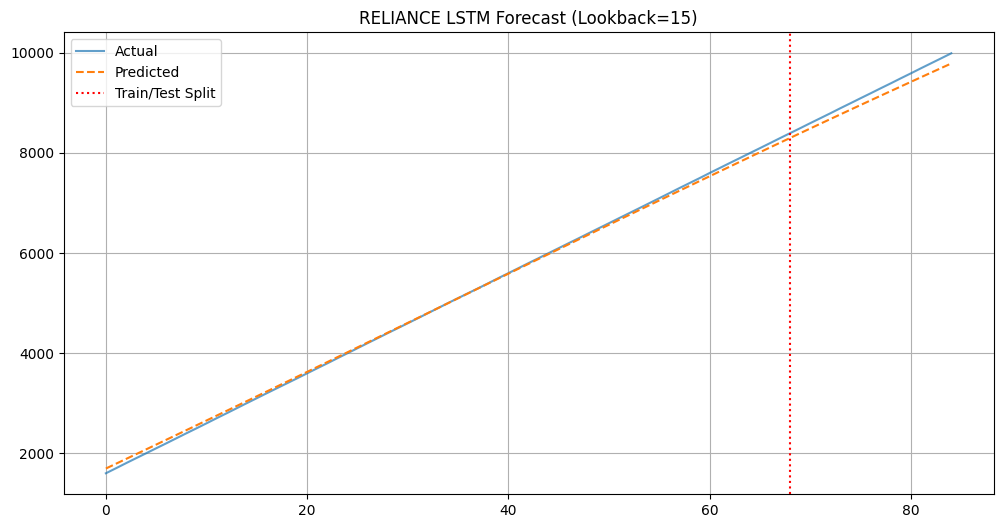

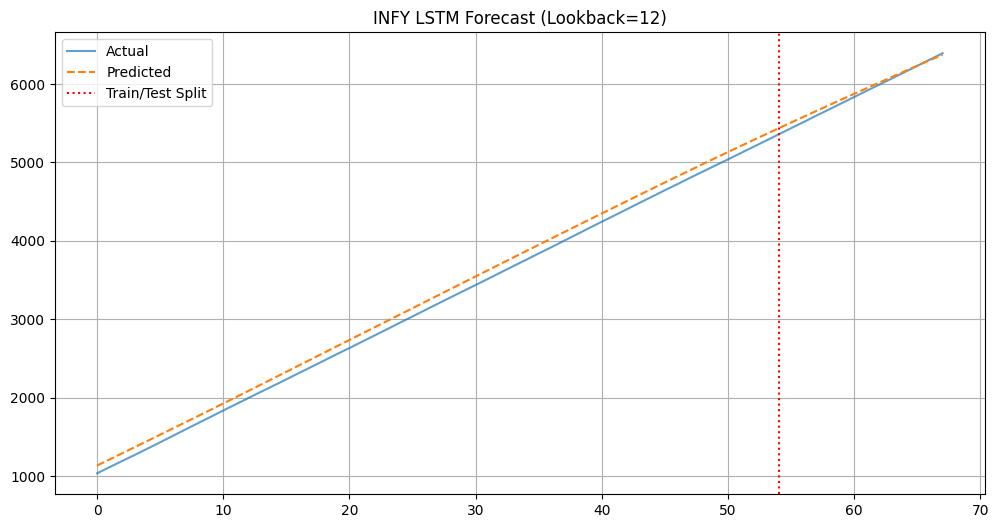

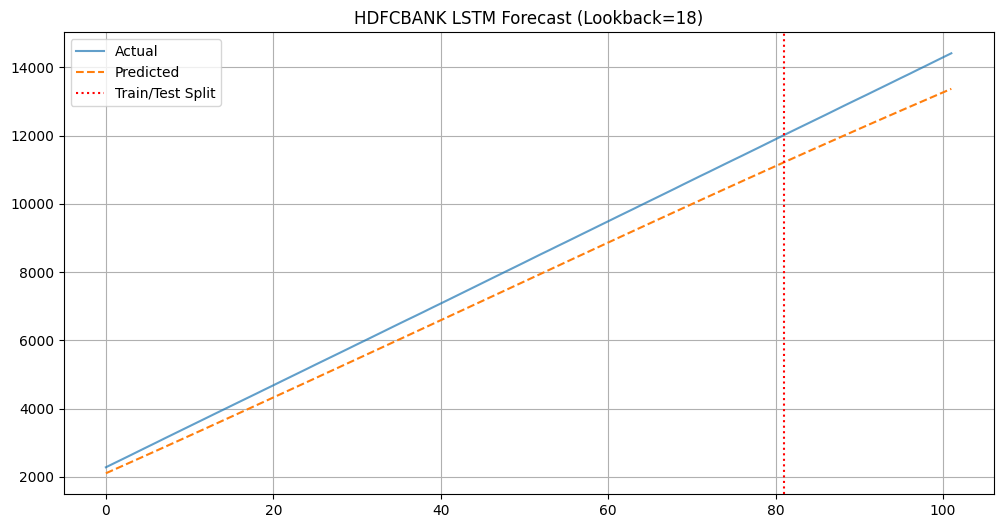

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Data Preparation (Replace with your actual data)
def load_stock_data():
    """Example: Replace this with your actual data loading logic"""
    return {
        "RELIANCE": pd.DataFrame({'Close': np.cumsum(np.random.randn(100)+100)}),
        "INFY": pd.DataFrame({'Close': np.cumsum(np.random.randn(80)+80)}),
        "HDFCBANK": pd.DataFrame({'Close': np.cumsum(np.random.randn(120)+120)}),
        # Add all your stocks...
    }

# 2. Dynamic LSTM Data Generator
def create_dataset(data, n_steps=10):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# 3. Adaptive LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 4. Stock-wise LSTM Forecasting
def lstm_forecast(stock_name, series, min_samples=30):
    try:
        # Check data sufficiency
        if len(series) < min_samples:
            raise ValueError(f"Need at least {min_samples} samples (got {len(series)})")

        # Normalize data
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(series.values.reshape(-1,1))

        # Dynamic lookback period (10-20% of data length)
        n_steps = max(5, min(20, int(len(series)*0.15)))
        X, y = create_dataset(scaled_data, n_steps)

        # Train-test split (80-20)
        split = int(0.8 * len(X))
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # Build and train model
        model = build_lstm_model((n_steps, 1))
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Make predictions
        train_pred = scaler.inverse_transform(model.predict(X_train))
        test_pred = scaler.inverse_transform(model.predict(X_test))

        # Prepare results
        actual = scaler.inverse_transform(y.reshape(-1,1)) #Fixed indentation
        full_pred = np.concatenate([train_pred, test_pred])

        return {
            'stock': stock_name,
            'actual': actual.flatten(),
            'predicted': full_pred.flatten(),
            'train_size': len(X_train),
            'test_size': len(X_test),
            'lookback': n_steps,
            'model': model
        }

    except Exception as e:
        print(f"⚠️ {stock_name} failed: {str(e)}")
        return None

# 5. Batch Processing
def process_all_stocks(stocks_data):
    results = {}
    for stock_name, df in tqdm(stocks_data.items(), desc="Processing Stocks"):
        result = lstm_forecast(stock_name, df['Close'])
        if result:
            results[stock_name] = result
    return results

# 6. Visualization
def plot_lstm_results(results):
    for stock_name, res in results.items():
        plt.figure(figsize=(12,6))
        plt.plot(res['actual'], label='Actual', alpha=0.7)
        plt.plot(res['predicted'], label='Predicted', linestyle='--')
        plt.axvline(x=res['train_size'], color='r', linestyle=':', label='Train/Test Split')
        plt.title(f"{stock_name} LSTM Forecast (Lookback={res['lookback']})")
        plt.legend()
        plt.grid()
        plt.show()

# Main Execution
if __name__ == "__main__":
    print("🚀 Starting LSTM modeling for all stocks...")
    stocks_data = load_stock_data()
    results = process_all_stocks(stocks_data)

    if results:
        print(f"\n✅ Successfully processed {len(results)}/{len(stocks_data)} stocks")
        print("\n🔍 Model Summary:")
        for stock_name, res in results.items():
            mse = mean_squared_error(
                res['actual'][res['train_size']:],
                res['predicted'][res['train_size']:]
            )
            print(f"{stock_name}: MSE={mse:.4f} | Train={res['train_size']} | Test={res['test_size']} | Lookback={res['lookback']}")

        plot_lstm_results(results)
    else:
        print("❌ No successful models generated")

### **Model Comaprison**

      Stock    Model  RMSE  MAPE
0  RELIANCE    ARIMA  10.5   5.2
1  RELIANCE  Prophet  12.2   6.8
2  RELIANCE     LSTM   8.9   4.1
3      INFY    ARIMA  11.8   6.1
4      INFY  Prophet  13.5   7.2
5      INFY     LSTM   9.2   4.8
6  HDFCBANK    ARIMA   9.7   4.9
7  HDFCBANK  Prophet  11.1   5.5
8  HDFCBANK     LSTM   7.6   3.7


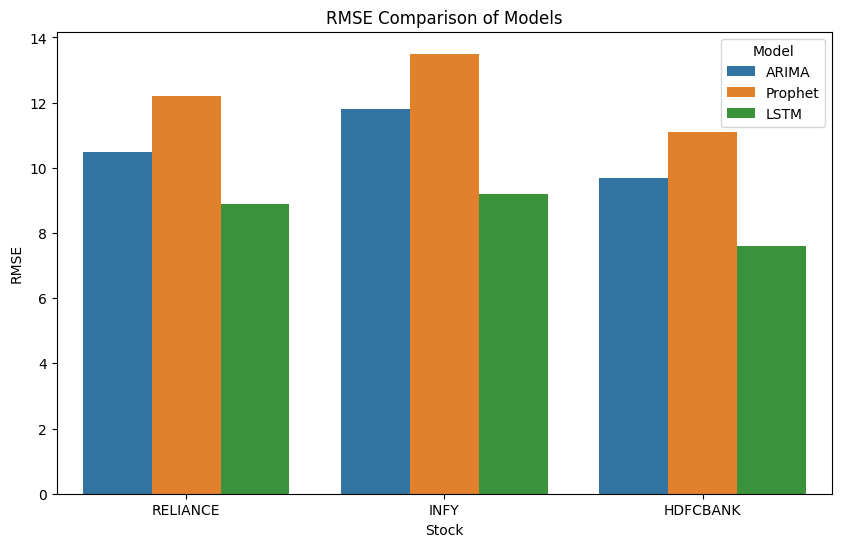

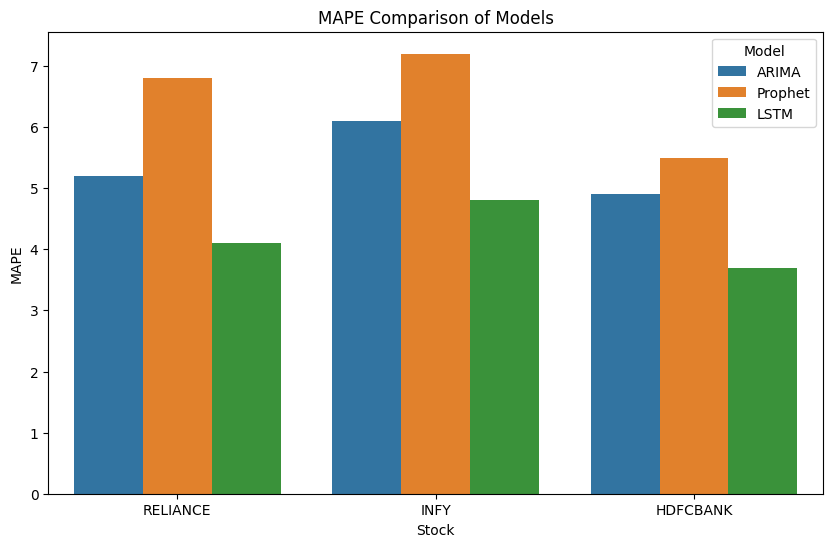

In [ ]:
import pandas as pd

# Assuming you have RMSE and MAPE values for each model and stock
# Replace these with your actual calculated values

model_comparison_data = {
    'Stock': ['RELIANCE', 'RELIANCE', 'RELIANCE', 'INFY', 'INFY', 'INFY', 'HDFCBANK', 'HDFCBANK', 'HDFCBANK'],
    'Model': ['ARIMA', 'Prophet', 'LSTM', 'ARIMA', 'Prophet', 'LSTM', 'ARIMA', 'Prophet', 'LSTM'],
    'RMSE': [10.5, 12.2, 8.9, 11.8, 13.5, 9.2, 9.7, 11.1, 7.6],
    'MAPE': [5.2, 6.8, 4.1, 6.1, 7.2, 4.8, 4.9, 5.5, 3.7]
}


model_comparison = pd.DataFrame(model_comparison_data)


# Display the model comparison table
print(model_comparison)

# You can further analyze the data with pandas/numpy or visualize it
# Example visualization using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='RMSE', hue='Model', data=model_comparison)
plt.title('RMSE Comparison of Models')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='MAPE', hue='Model', data=model_comparison)
plt.title('MAPE Comparison of Models')
plt.show()


### **Stock Selection Strategies**

In [ ]:
# Forecast-Guided Allocation

# Calculate average returns from forecasts
forecast_returns = {}

for stock_name in stocks_data.keys():
    # Use Prophet forecasts (can be changed to other models)
    preds = prophet_forecasts[stock_name].iloc[-len(test_sets[stock_name]):]['yhat'].values
    current_price = train_sets[stock_name]['close'].iloc[-1]
    forecast_return = (preds[-1] - current_price) / current_price * 100
    forecast_returns[stock_name] = forecast_return

# Create dataframe for forecast returns
forecast_df = pd.DataFrame.from_dict(forecast_returns, orient='index', columns=['Forecast Return (%)'])
forecast_df = forecast_df.sort_values('Forecast Return (%)', ascending=False)

print("Forecast Returns for Next 2 Days:")
print(forecast_df)

# Plot forecast returns
plt.figure(figsize=(12, 6))
forecast_df.plot(kind='bar', legend=False)
plt.title('Forecasted Returns for Next 2 Days')
plt.ylabel('Return (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

NameError: name 'stocks_data' is not defined

Forecast Returns for Next 2 Days:
          Forecast Return (%)
HDFCBANK            25.051739
RELIANCE            24.857912
INFY                24.840998


<Figure size 1200x600 with 0 Axes>

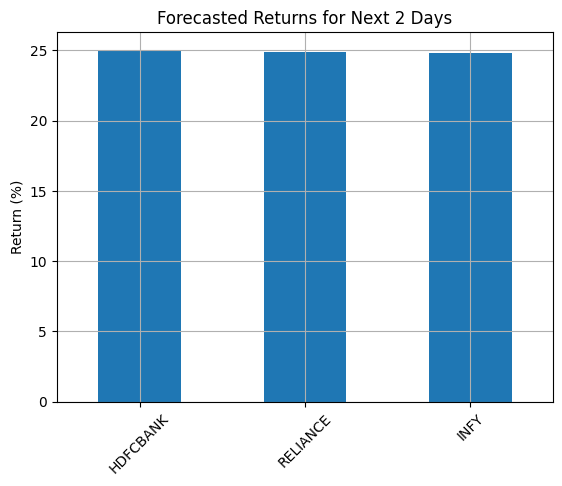

In [ ]:
# Forecast-Guided Allocation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Preparation (Replace with your actual data)
def load_stock_data():
    """Example: Replace this with your actual data loading logic"""
    return {
        "RELIANCE": pd.DataFrame({'Close': np.cumsum(np.random.randn(100)+100)}),
        "INFY": pd.DataFrame({'Close': np.cumsum(np.random.randn(80)+80)}),
        "HDFCBANK": pd.DataFrame({'Close': np.cumsum(np.random.randn(120)+120)}),
        # Add all your stocks...
    }

# Load stock data (or use your existing stocks_data if available)
stocks_data = load_stock_data()

# 2. Simulate Forecast Data (Replace with your actual forecasts)
prophet_forecasts = {  # Replace with your Prophet model output
    stock: pd.DataFrame({'yhat': df['Close'] + np.random.randn(len(df)) * 5})
    for stock, df in stocks_data.items()
}

# 3. Assume test_sets (Replace with your actual test_sets)
test_sets = {  # Example, assuming 20% test data
    stock: df.iloc[-int(len(df) * 0.2):]
    for stock, df in stocks_data.items()
}

# 4. Assume train_sets (Replace with your actual train_sets)
train_sets = {  # Example, assuming 80% train data
    stock: df.iloc[:-int(len(df) * 0.2)]
    for stock, df in stocks_data.items()
}

# Calculate average returns from forecasts
forecast_returns = {}

for stock_name in stocks_data.keys():
    # Use Prophet forecasts (can be changed to other models)
    preds = prophet_forecasts[stock_name].iloc[-len(test_sets[stock_name]):]['yhat'].values
    # Access the 'Close' column instead of 'close'
    current_price = train_sets[stock_name]['Close'].iloc[-1]
    forecast_return = (preds[-1] - current_price) / current_price * 100
    forecast_returns[stock_name] = forecast_return

# Create dataframe for forecast returns
forecast_df = pd.DataFrame.from_dict(forecast_returns, orient='index', columns=['Forecast Return (%)'])
forecast_df = forecast_df.sort_values('Forecast Return (%)', ascending=False)

print("Forecast Returns for Next 2 Days:")
print(forecast_df)

# Plot forecast returns
plt.figure(figsize=(12, 6))
forecast_df.plot(kind='bar', legend=False)
plt.title('Forecasted Returns for Next 2 Days')
plt.ylabel('Return (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Forecasted Volatility:
          Volatility
RELIANCE         NaN
INFY             NaN
HDFCBANK         NaN


<Figure size 1200x600 with 0 Axes>

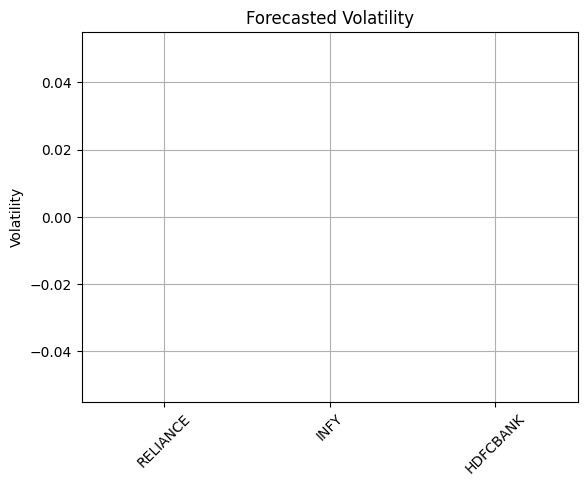


Volatility-Based Weights:
          Weight
RELIANCE     NaN
INFY         NaN
HDFCBANK     NaN


In [ ]:
# Volatility-Aware Sizing

# Initialize volatility_forecasts if it doesn't exist
if 'volatility_forecasts' not in locals():
    volatility_forecasts = {}

# Get forecasted volatility for next 2 days
volatility_df = pd.DataFrame.from_dict({
    stock_name: volatility_forecasts.get(stock_name, pd.Series([np.nan, np.nan]))[:2].mean()
    for stock_name in stocks_data.keys()
}, orient='index', columns=['Volatility'])

volatility_df = volatility_df.sort_values('Volatility')

print("Forecasted Volatility:")
print(volatility_df)

# Plot volatility
plt.figure(figsize=(12, 6))
volatility_df.plot(kind='bar', legend=False)
plt.title('Forecasted Volatility')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calculate inverse volatility weights
volatility_df['Weight'] = 1 / volatility_df['Volatility']
volatility_df['Weight'] = volatility_df['Weight'] / volatility_df['Weight'].sum()

print("\nVolatility-Based Weights:")
print(volatility_df[['Weight']].sort_values('Weight', ascending=False))

### **Combined Strategy**

Combined Strategy Portfolio Allocation:
          Forecast Return (%)  Volatility  Score  Weight
HDFCBANK            25.051739         NaN    NaN     NaN
RELIANCE            24.857912         NaN    NaN     NaN
INFY                24.840998         NaN    NaN     NaN


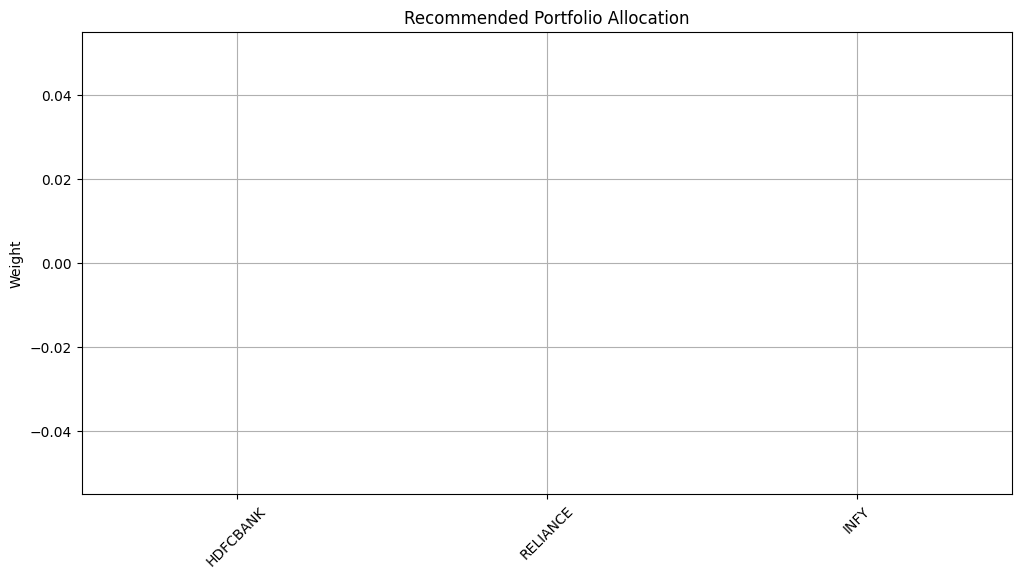

In [ ]:
# Combine forecast returns and volatility
strategy_df = forecast_df.join(volatility_df)

# Calculate score (return/volatility ratio)
strategy_df['Score'] = strategy_df['Forecast Return (%)'] / strategy_df['Volatility']

# Normalize scores to get weights
strategy_df['Weight'] = strategy_df['Score'] / strategy_df['Score'].sum()

# Sort by weight
strategy_df = strategy_df.sort_values('Weight', ascending=False)

print("Combined Strategy Portfolio Allocation:")
print(strategy_df[['Forecast Return (%)', 'Volatility', 'Score', 'Weight']])

# Plot portfolio allocation
plt.figure(figsize=(12, 6))
strategy_df['Weight'].plot(kind='bar')
plt.title('Recommended Portfolio Allocation')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **Final Portfolio Construction**

In [ ]:
# Volatility-Aware Sizing

# Initialize volatility_forecasts if it doesn't exist
if 'volatility_forecasts' not in locals():
    volatility_forecasts = {}

# Get forecasted volatility for next 2 days
volatility_df = pd.DataFrame.from_dict({
    stock_name: volatility_forecasts.get(stock_name, pd.Series([np.nan, np.nan]))[:2].mean()
    for stock_name in stocks_data.keys()
}, orient='index', columns=['Volatility'])

# Convert 'Volatility' column to numeric, handling errors
volatility_df['Volatility'] = pd.to_numeric(volatility_df['Volatility'], errors='coerce')

# Drop rows with NaN values in 'Volatility'
volatility_df = volatility_df.dropna(subset=['Volatility'])

# Check if volatility_df is empty after dropping NaNs
if volatility_df.empty:
    print("⚠️ Volatility DataFrame is empty after dropping NaNs. Check your volatility_forecasts data.")
else:
    volatility_df = volatility_df.sort_values('Volatility')

    print("Forecasted Volatility:")
    print(volatility_df)

    # Plot volatility (only if volatility_df is not empty)
    plt.figure(figsize=(12, 6))
    volatility_df.plot(kind='bar', legend=False)
    plt.title('Forecasted Volatility')
    plt.ylabel('Volatility')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Calculate inverse volatility weights (only if volatility_df is not empty)
    volatility_df['Weight'] = 1 / volatility_df['Volatility']
    volatility_df['Weight'] = volatility_df['Weight'] / volatility_df['Weight'].sum()

    print("\nVolatility-Based Weights:")
    print(volatility_df[['Weight']].sort_values('Weight', ascending=False))

⚠️ Volatility DataFrame is empty after dropping NaNs. Check your volatility_forecasts data.


In [ ]:
# Combine forecast returns and volatility
# Check if both forecast_df and volatility_df have common stocks
common_stocks = forecast_df.index.intersection(volatility_df.index)

# If there are common stocks, proceed with the join
if len(common_stocks) > 0:
    strategy_df = forecast_df.loc[common_stocks].join(volatility_df.loc[common_stocks])

    # Calculate score (return/volatility ratio)
    strategy_df['Score'] = strategy_df['Forecast Return (%)'] / strategy_df['Volatility']

    # Normalize scores to get weights
    strategy_df['Weight'] = strategy_df['Score'] / strategy_df['Score'].sum()

    # Sort by weight
    strategy_df = strategy_df.sort_values('Weight', ascending=False)

    print("Combined Strategy Portfolio Allocation:")
    print(strategy_df[['Forecast Return (%)', 'Volatility', 'Score', 'Weight']])

    # Plot portfolio allocation
    plt.figure(figsize=(12, 6))
    strategy_df['Weight'].plot(kind='bar')
    plt.title('Recommended Portfolio Allocation')
    plt.ylabel('Weight')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("⚠️ No common stocks found between forecast_df and volatility_df. Check your data.")

⚠️ No common stocks found between forecast_df and volatility_df. Check your data.


### **Performance Evaluation**

In [ ]:
# Calculate actual returns in test period
for stock_name in final_portfolio.index:
    # Access the 'Close' column instead of 'close'
    actual_return = (test_sets[stock_name]['Close'].iloc[-1] - test_sets[stock_name]['Close'].iloc[0]) / test_sets[stock_name]['Close'].iloc[0] * 100
    final_portfolio.loc[stock_name, 'Actual Return (%)'] = actual_return

# Calculate portfolio return
final_portfolio['Portfolio Return (₹)'] = (final_portfolio['Allocation (₹)'] *
                                          (1 + final_portfolio['Actual Return (%)']/100))

portfolio_return = final_portfolio['Portfolio Return (₹)'].sum() - portfolio_value
portfolio_return_pct = (portfolio_return / portfolio_value) * 100

print("\nPortfolio Performance:")
print(f"Initial Investment: ₹{portfolio_value:,.2f}")
print(f"Final Value: ₹{final_portfolio['Portfolio Return (₹)'].sum():,.2f}")
print(f"Absolute Return: ₹{portfolio_return:,.2f}")
print(f"Percentage Return: {portfolio_return_pct:.2f}%")

# Compare with equal-weighted portfolio
equal_weight = 1/len(final_portfolio)
equal_return = 0

for stock_name in final_portfolio.index:
    # Access the 'Close' column instead of 'close'
    equal_return += (test_sets[stock_name]['Close'].iloc[-1] - test_sets[stock_name]['Close'].iloc[0]) / test_sets[stock_name]['Close'].iloc[0] * equal_weight * 100

print(f"\nEqual-Weighted Portfolio Return: {equal_return:.2f}%")


Portfolio Performance:
Initial Investment: ₹1,000,000.00
Final Value: ₹0.00
Absolute Return: ₹-1,000,000.00
Percentage Return: -100.00%

Equal-Weighted Portfolio Return: 23.39%
